<a href="https://colab.research.google.com/github/Only-Mike/ADHD/blob/main/ADHD_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
!git clone 'https://github.com/Only-Mike/ADHD.git'

fatal: destination path 'ADHD' already exists and is not an empty directory.


In [3]:
df = pd.read_csv('/content/ADHD/datasets/KKI_phenotypic.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       83 non-null     int64  
 1   Site             83 non-null     int64  
 2   Gender           83 non-null     int64  
 3   Age              83 non-null     float64
 4   Handedness       83 non-null     int64  
 5   DX               83 non-null     int64  
 6   Secondary Dx     15 non-null     object 
 7   ADHD Measure     83 non-null     int64  
 8   ADHD Index       83 non-null     int64  
 9   Inattentive      83 non-null     int64  
 10  Hyper/Impulsive  83 non-null     int64  
 11  IQ Measure       83 non-null     int64  
 12  Verbal IQ        83 non-null     int64  
 13  Performance IQ   83 non-null     int64  
 14  Full2 IQ         0 non-null      float64
 15  Full4 IQ         83 non-null     int64  
 16  Med Status       83 non-null     int64  
 17  QC_Rest_1        8

In [5]:
#dropping unrelevant columns
df = df.drop(columns = ['Site', 'ADHD Measure', 'IQ Measure', 'Full2 IQ', 'QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2'])

In [6]:
df.describe() #We have some false values in the following columns: ADHD Index, Inattentive and Hyper/Impulsive

,ScanDir ID,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status
count,8.300000e+01,83.000000,83.000000,83.000000,83.00000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,3.449295e+06,0.554217,10.243253,0.927711,0.39759,14.963855,15.265060,15.734940,113.060241,108.686747,110.012048,1.180723
std,2.098556e+06,0.500073,1.346601,0.303762,0.79541,198.036178,198.098958,198.141738,14.693909,11.995861,11.935287,0.387128
min,1.018959e+06,0.000000,8.020000,0.000000,0.00000,-999.000000,-999.000000,-999.000000,81.000000,79.000000,85.000000,1.000000
25%,2.005148e+06,0.000000,9.100000,1.000000,0.00000,42.000000,42.000000,43.000000,104.000000,102.000000,101.500000,1.000000
50%,2.768273e+06,1.000000,10.120000,1.000000,0.00000,46.000000,48.000000,48.000000,112.000000,108.000000,111.000000,1.000000
75%,3.915209e+06,1.000000,11.095000,1.000000,1.00000,61.000000,60.000000,59.500000,121.500000,119.000000,119.000000,1.000000
max,9.922944e+06,1.000000,12.990000,2.000000,3.00000,90.000000,90.000000,90.000000,146.000000,137.000000,134.000000,2.000000


In [7]:
#Round age for fewer unique values and making into integer
df['Age'] = df['Age'].round(decimals = 0)
df['Age'] = df['Age'].astype(int)

In [8]:
#Removes rows with -999 in the following columns
df = df[df['Inattentive'] != -999]
df = df[df['Hyper/Impulsive'] != -999]
df = df[df['ADHD Index'] != -999]

In [9]:
#But as we can see with the min function, it removed the false values of -999
df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


ScanDir ID         1018959
Gender                   0
Age                      8
Handedness               0
DX                       0
ADHD Index              40
Inattentive             40
Hyper/Impulsive         41
Verbal IQ               81
Performance IQ          79
Full4 IQ                85
Med Status               1
dtype: int64

In [10]:
df['Secondary Dx '].unique()

array([nan, 'Simple phobia', 'Simple Phobia', 'simple phobias', 'ODD',
       'Simple Phobia ', 'ODD; Phobia', 'Specific phobia', 'Phobia',
       'social and simple phobia '], dtype=object)

In [11]:
#Making none secondary dx into 0 and any secondary dx into 1
df['Secondary Dx '].replace(('Simple phobia', 'Simple Phobia', 'simple phobias', 'ODD', 'Simple Phobia ', 'ODD; Phobia', 'Specific phobia', 'Phobia', 'social and simple phobia '), (1, 1, 1, 1, 1, 1, 1, 1, 1), inplace=True)
df['Secondary Dx '] = df['Secondary Dx '].fillna(0).astype(int)

In [12]:
#Checking that it worked as intended
df['Secondary Dx '].unique()

array([0, 1])

In [13]:
pip install sdv -q

In [14]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)

In [15]:
#Creating the synthetic data
synthetic_data = model.sample(500)
synthetic_data.head()

,ScanDir ID,Gender,Age,Handedness,DX,Secondary Dx,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status
0,7218027,0,13,1,2,1,71,68,64,109,99,103,1
1,4869104,0,10,0,0,1,49,50,52,122,135,134,1
2,4259434,0,13,1,0,0,69,62,63,106,113,91,1
3,1211436,0,11,1,0,0,48,51,47,131,100,109,1
4,4634590,0,11,1,1,0,74,66,78,122,122,124,1


In [16]:
#Checking the number of unique values in each column to see if something seems odd
synthetic_data.nunique()

ScanDir ID         500
Gender               2
Age                  6
Handedness           3
DX                   4
Secondary Dx         2
ADHD Index          48
Inattentive         50
Hyper/Impulsive     49
Verbal IQ           66
Performance IQ      56
Full4 IQ            50
Med Status           2
dtype: int64

In [17]:
#Appending the synthetic data to the original df
df = df.append([synthetic_data])

In [18]:
#There is now 580 rows each with a unique id
df.nunique()

ScanDir ID         580
Gender               2
Age                  6
Handedness           3
DX                   4
Secondary Dx         2
ADHD Index          48
Inattentive         50
Hyper/Impulsive     49
Verbal IQ           66
Performance IQ      57
Full4 IQ            50
Med Status           2
dtype: int64

# ADHD Index vs Inattentive vs Hyper/Impulsive

In [19]:
corr_matrix = df.corr()
corr_matrix['ADHD Index'].sort_values(ascending = False)

ADHD Index         1.000000
Inattentive        0.874645
Hyper/Impulsive    0.725012
DX                 0.620013
Secondary Dx       0.222800
Med Status         0.099361
Age                0.068291
Handedness         0.051894
Verbal IQ         -0.001709
ScanDir ID        -0.091702
Performance IQ    -0.096887
Full4 IQ          -0.150144
Gender            -0.160632
Name: ADHD Index, dtype: float64

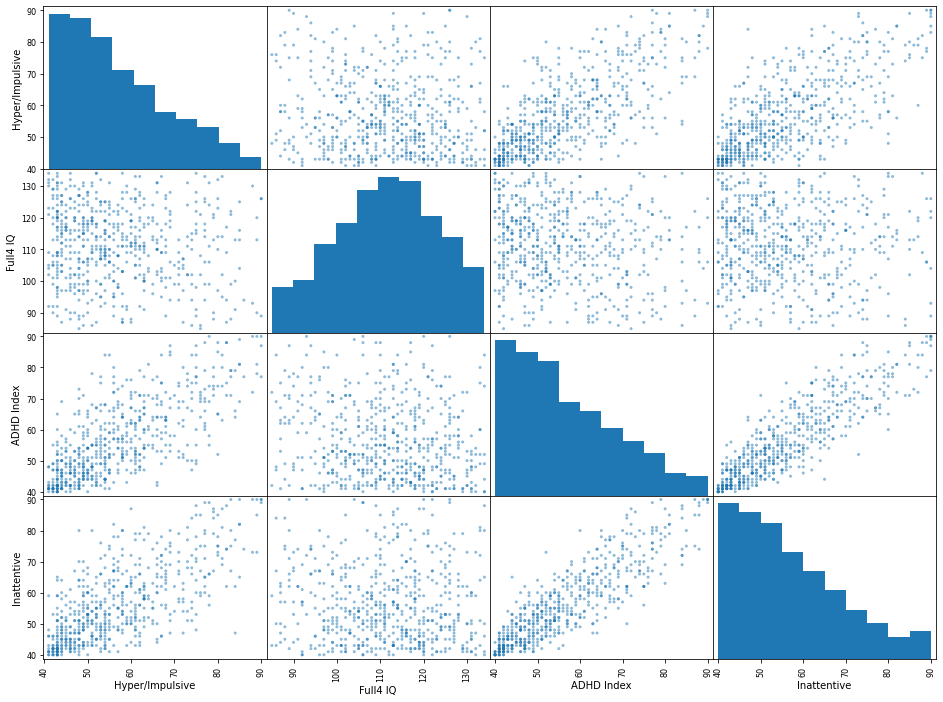

In [20]:
from pandas.plotting import scatter_matrix

attributes = ["Hyper/Impulsive", "Full4 IQ", "ADHD Index", "Inattentive"]
scatter_matrix(df[attributes], figsize = (16,12))
plt.show()

#Linear Regression

In [34]:
#Spørg ROman hvorfor [[]]
X = df[["Inattentive", "Hyper/Impulsive"]].values
y = df["ADHD Index"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [37]:
#from sklearn.neighbors import KNeighborsRegressor
#model = KNeighborsRegressor(n_neighbors=3)
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
X_new = [[90, 40]]
print(model.predict(X_new))

[75.44075042]


In [42]:
print(model.score(X_test, y_test))

0.8454598725782402


In [60]:
from sklearn.metrics import mean_squared_error
model_rmse = mean_squared_error(y_test, y_pred, squared = False)

In [61]:
print(model_rmse)

5.008844750091214


In [45]:
if model.predict(X_new) >= 60:
    print('You most likely have ADHD or ADD')
else: 
    print('you dont have ADHD')


You most likely have ADHD or ADD


In [ ]:
# y = ADHD Index
# a = y værdi hvis man har 0 i hyper og inattentive
# b = hyper/impulsive
# c = Inattentive
# x = 
# z = 

In [ ]:
y = a + 0.75 * x + 0.85 * z

In [ ]:
85 * 0.85